# Упражнение 2

Цель упражнения - применить на практике инструменты работы с текстом.

Дан файл, который получен с помощью API уже знакомого ресурса op.itmo.ru (эндпойнт https://op.itmo.ru/api/item/)

In [ ]:
!gdown 1rI1qJbbt9iYSe0sKT9tDNwZTGwMuu-tR

Downloading...
From: https://drive.google.com/uc?id=1rI1qJbbt9iYSe0sKT9tDNwZTGwMuu-tR
To: /content/items.xlsx
100% 1.20M/1.20M [00:00<00:00, 23.0MB/s]


In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import string

In [ ]:
df = pd.read_excel('/content/items.xlsx', usecols=['id', 'name', 'domain', 'value'])

In [ ]:
df.head(10)

,id,name,domain,value
0,202,Алгоритм Форда-Фалкерсона,"{'id': 15, 'name': 'Теория графов (часть Матем...",28
1,16866,Обратные задачи биофизики,"{'id': 21, 'name': 'Биотехнологии'}",0
2,204,Теорема Холла,"{'id': 15, 'name': 'Теория графов (часть Матем...",9
3,21856,Adjustment of optical instruments,"{'id': 223, 'name': 'Оптика'}",34
4,24233,Diffraction of rays in crystals,"{'id': 37, 'name': 'Наука и методология исслед...",0
5,24211,Personal Radio Access Systems,"{'id': 33, 'name': 'Телекоммуникации'}",2
6,21494,Optimal controller design for linear time-inva...,"{'id': 34, 'name': 'Теория управления'}",3
7,21742,Архитектура хранения данных,"{'id': 17, 'name': 'Информационные технологии'}",14
8,11409,Общестроительное проектирование предприятий мо...,"{'id': 21, 'name': 'Биотехнологии'}",1
9,21793,Обществознание,"{'id': 315, 'name': 'Социология'}",10


Описание данных: id - идентификатор учебной сущности, name - название учебной сущности, domain - информация о предметной области (id - идентификатор предметной области, namе - название предметной области), value - значение, которое можно интерпретировать как важность учебной сущности в системе.

## Задание 2.1

Посчитайте количество разных предметных областей.

Выведите их id, название и количество разных учебных сущностей, относящихся к конкретной предметной области.

Сделайте визуализацию предметных областей.

In [ ]:
parsed_dict = {}
for domain_str in df.domain:
  try:
    domain_str = domain_str.replace("'", '"')
    domain = json.loads(domain_str)
    id = domain.get('id')
    name = domain.get('name')
  except AttributeError:
    continue

  if parsed_dict.get(id) is None:
    parsed_dict[id] = {
        'name': name,
        'count': 1
    }
  else:
    parsed_dict[id]['count'] += 1

In [ ]:
print(f'Количество разных предметных областей: {len(parsed_dict)}\n')
for id in parsed_dict:
  print(f'id: {id}; name: {parsed_dict[id]["name"]} к-во разных учебных сущностей {parsed_dict[id]["count"]}')

Количество разных предметных областей: 61

id: 15; name: Теория графов (часть Математики) к-во разных учебных сущностей 59
id: 21; name: Биотехнологии к-во разных учебных сущностей 1276
id: 223; name: Оптика к-во разных учебных сущностей 253
id: 37; name: Наука и методология исследований к-во разных учебных сущностей 494
id: 33; name: Телекоммуникации к-во разных учебных сущностей 342
id: 34; name: Теория управления к-во разных учебных сущностей 272
id: 17; name: Информационные технологии к-во разных учебных сущностей 3706
id: 315; name: Социология к-во разных учебных сущностей 72
id: 11; name: Математика к-во разных учебных сущностей 994
id: 20; name: Физика к-во разных учебных сущностей 2813
id: 352; name: Низкотемпературные системы к-во разных учебных сущностей 152
id: 14; name: Искусственный интеллект к-во разных учебных сущностей 710
id: 24; name: Химия к-во разных учебных сущностей 525
id: 40; name: Экономика и финансы к-во разных учебных сущностей 1093
id: 32; name: Метрология и

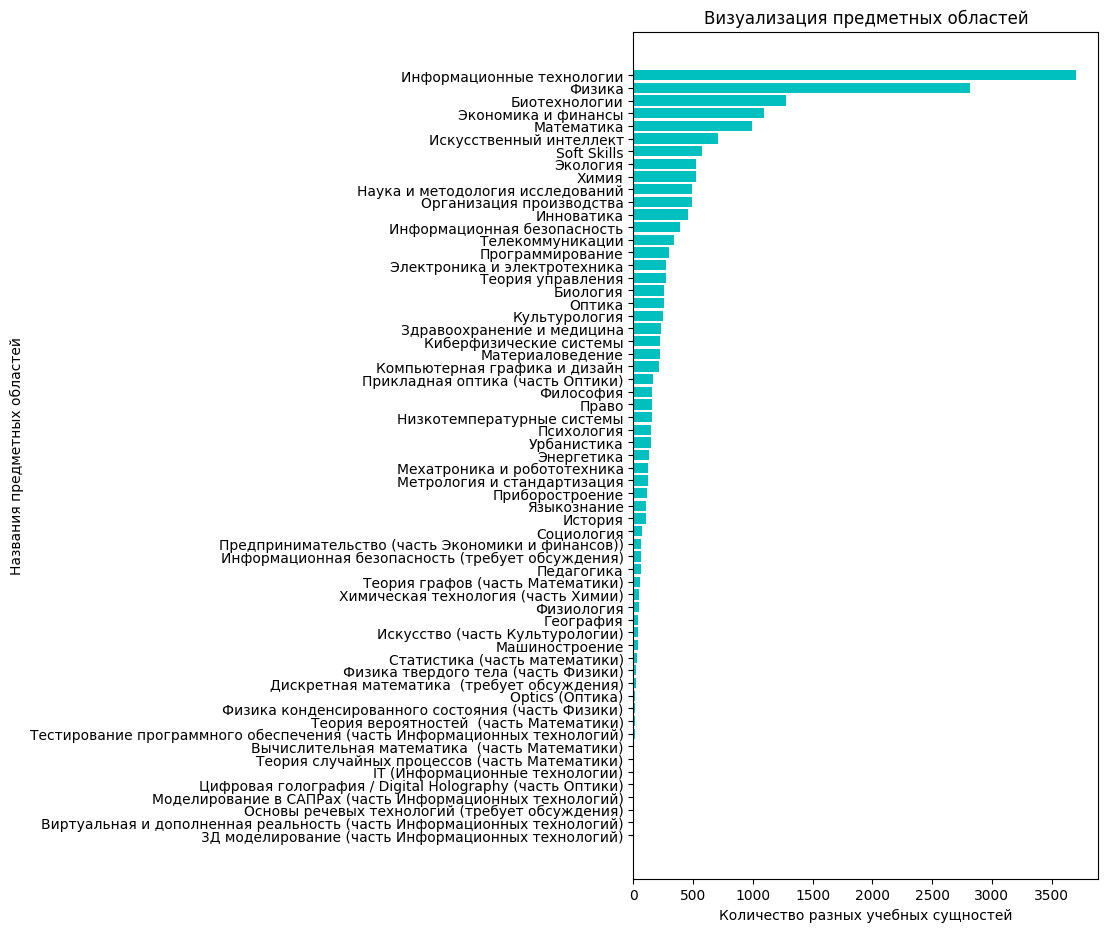

In [ ]:
plt.figure(figsize=(6, 11))

for id in dict(sorted(parsed_dict.items(), key=lambda item: item[1]['count'])):
  plt.barh(parsed_dict[id]['name'], parsed_dict[id]['count'], color='c')

plt.xlabel('Количество разных учебных сущностей')
plt.ylabel('Названия предметных областей')
plt.title('Визуализация предметных областей')
plt.show()

### Выводы

Исходя из полученного графика, можно сказать, что распределение числа разных учебных сущностей в предметных областях не нормальное.

Наибольших значений по количеству достигают такие предметные области, как:
1. Информационные технологии
2. Физика
3. Биотехнологии

Я бы объяснил этот эффект таким образом: поскольку данные предметные области довольно популярны, а также в них есть действительно много того, о чем можно рассказать, поэтому именно они и стоят в тройке лидеров по количеству учебных сущностей.  

## Задание 2.2

Учебные сущности чаще всего представляют собой отдельные слова или словосочетания. Однако, в некоторых случаях ключевое слово состоит из большого количества слов. Посчитайте количество слов в названии каждой ключевой сущности. Выведите первые 25 учебных сущностей (id, name, количество слов), упорядоченные по убыванию количества слов.

In [ ]:
df['words_count'] = df['name'].apply(lambda row: len(row.split()))
df = df.sort_values(by=['words_count'], ascending=False)
df[['id', 'name', 'words_count']].head(25)

,id,name,words_count
14949,19806,определять степени принадлежности элементов за...,85
17462,19825,навыки решения следующих практических задач: п...,72
17581,19828,навыки решения следующих практических задач: п...,71
17476,19823,"умение доказывать, что: заданный неограф являе...",66
233,19814,навыки решения следующих практических задач: н...,57
17512,19839,навыки решения следующих практических задач: п...,53
448,21853,Результатом освоения дисциплины должно стать ф...,50
22019,26723,"Able to independently acquire, develop and app...",45
500,20677,Знание базовых понятий физиологических механи...,43
15829,19805,применять на практике знания терминологическог...,41


## Задание 2.3

Названия учебных сущностей должны начинаться с заглавной буквы. В конце названия не должно быть пробела и/или знака препинания (точка, запятая, восклицательный знак и т.п.). Будем называть ошибочными сущности, названия которых не удовлетворяют хотя бы одному из этих двух условий.

Выведите все ошибочные сущности (id и name), сгруппированные по предметной области.

In [ ]:
parsed_df = df[df['domain'].notna()]

parsed_df['domain_name'] = parsed_df.apply(lambda row: eval(row.domain)['name'], axis=1)
parsed_df['domain_id'] = parsed_df.apply(lambda row: eval(row.domain)['id'], axis=1)
parsed_df = parsed_df.drop('domain', axis=1)

<ipython-input-44-818ffe1531a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parsed_df['domain_name'] = parsed_df.apply(lambda row: eval(row.domain)['name'], axis=1)
<ipython-input-44-818ffe1531a6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parsed_df['domain_id'] = parsed_df.apply(lambda row: eval(row.domain)['id'], axis=1)


In [ ]:
parsed_df

,id,name,value,words_count,domain_name,domain_id
14949,19806,определять степени принадлежности элементов за...,2,85,Дискретная математика (требует обсуждения),221
17462,19825,навыки решения следующих практических задач: п...,2,72,Дискретная математика (требует обсуждения),221
17581,19828,навыки решения следующих практических задач: п...,3,71,Дискретная математика (требует обсуждения),221
17476,19823,"умение доказывать, что: заданный неограф являе...",1,66,Дискретная математика (требует обсуждения),221
233,19814,навыки решения следующих практических задач: н...,2,57,Дискретная математика (требует обсуждения),221
...,...,...,...,...,...,...
6221,7278,Цитоскелет,21,1,Биотехнологии,21
20977,25723,Микроскопия,0,1,Физика,20
2684,23311,макроптика,0,1,Прикладная оптика (часть Оптики),413
4726,10690,Графы,9,1,Информационные технологии,17


In [ ]:
mask = parsed_df['name'].str[0].str.islower() | parsed_df['name'].str.endswith(tuple(string.punctuation))

errors = parsed_df.loc[mask, ['id', 'name', 'domain_name']]
errors.sort_values(by=['domain_name'])

,id,name,domain_name
22143,26839,luminescence microscopy,Optics (Оптика)
1256,23731,навыки проведения научно-исследовательских раб...,Soft Skills
16960,19282,формирование системы ценностей команды,Soft Skills
20120,20264,Present the results of your work in the format...,Soft Skills
8063,9290,Обмен веществ (метаболизм),Биология
...,...,...,...
21671,26382,стилистика перевода,Языкознание
22047,26751,spoken English,Языкознание
22046,26752,written English,Языкознание
21670,26381,приемы и техники перевода,Языкознание


## Задание 2.4

В системе существуют дублирующиеся учебные сущности. На картинке снизу приведен пример: матрица и матрицы - это на самом деле одна и та же учебная сущность.

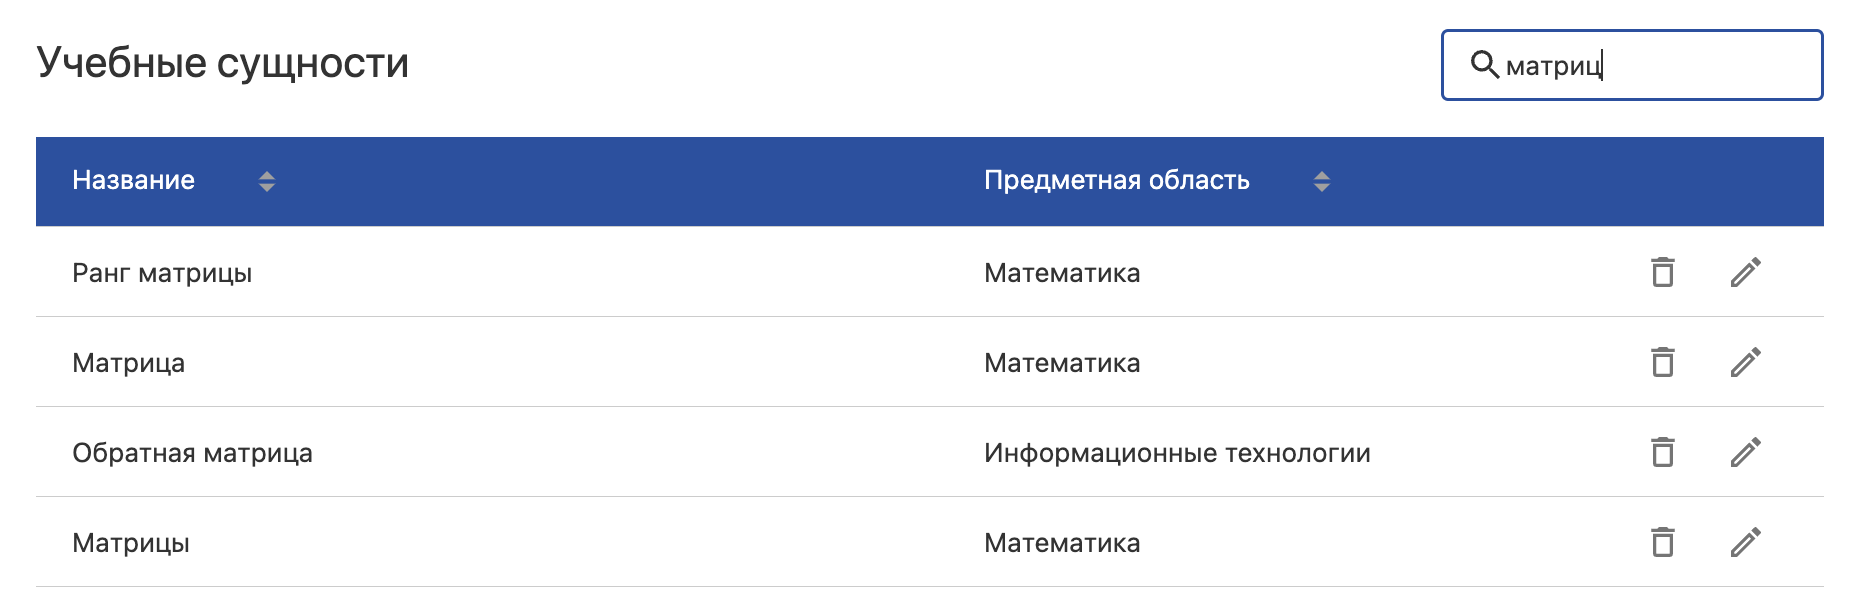

Ещё один пример. Дублирующиеся сущности подчеркнуты красным цветом.

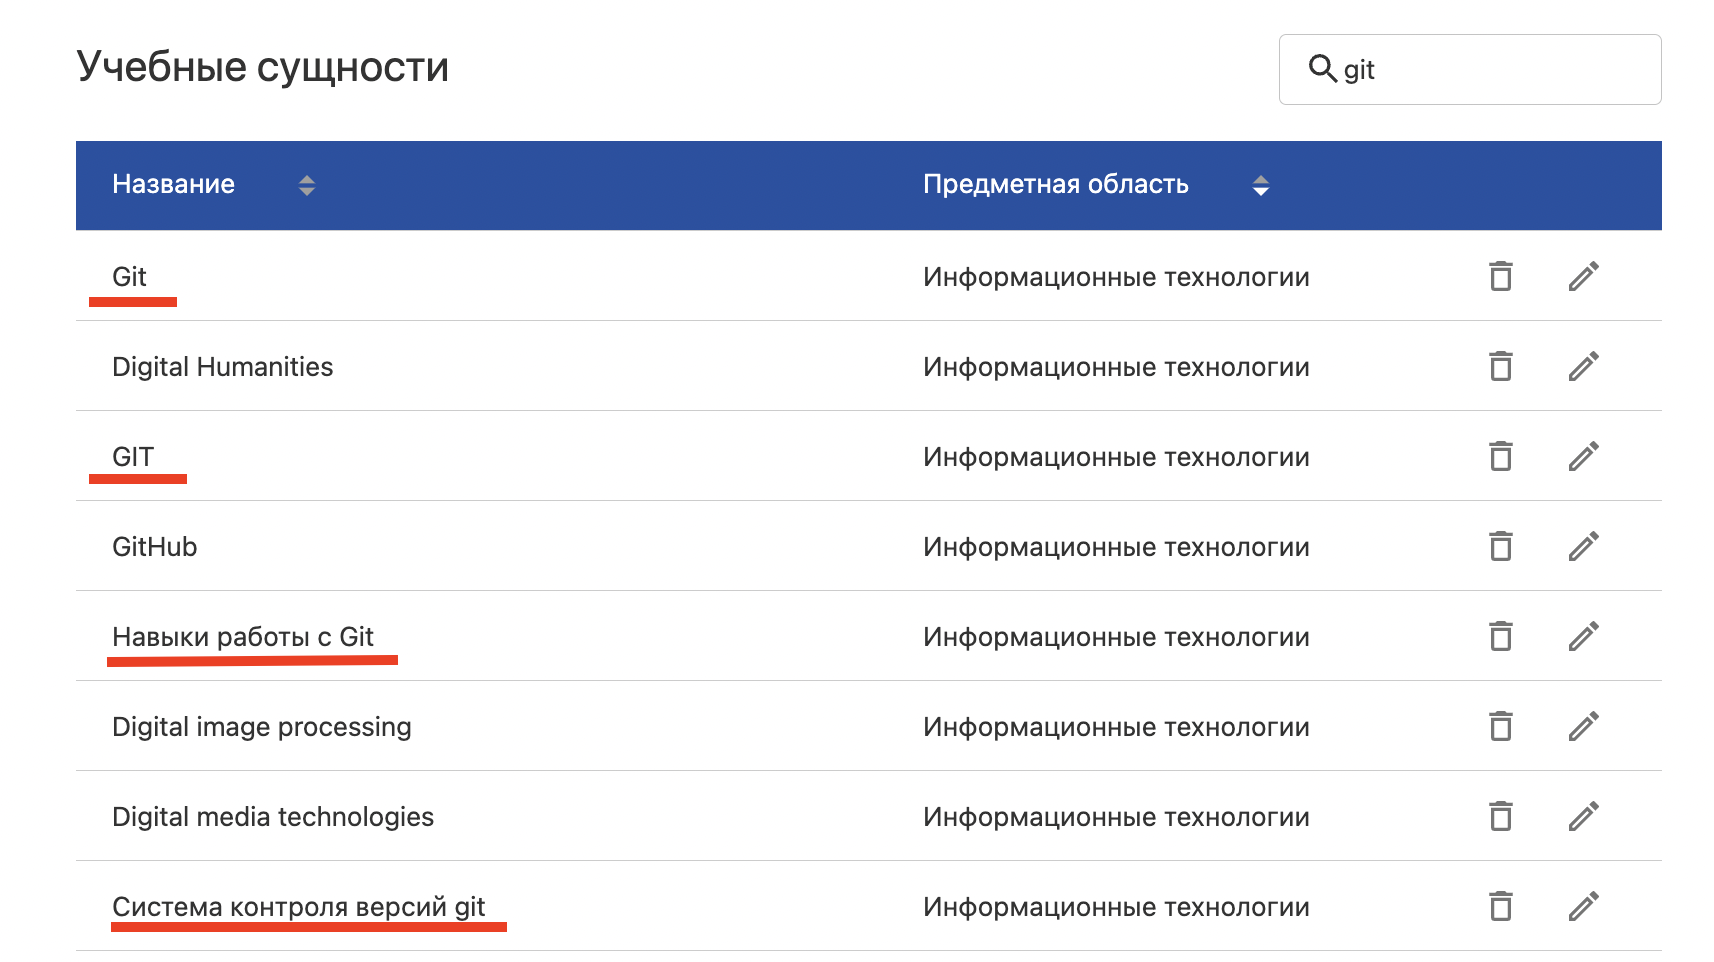

Сформулируйте несколько (больше трёх) критериев для поиска дублирующихся сущностей. Перечислите их.

1. Расстояние Левенштейна меньше 2
2. Строки в нижнем регистре совпадают
3. Строки без пробелов совпадают
4. Строки совпадают, если удалить стоп-слова

Реализуйте поиск дублирующихся сущностей по приведенным критериям. Результат выведите в следующем формате:
* учебную сущность id name нужно объединить с учебной сущностью id name

In [ ]:
!pip install python-Levenshtein
from Levenshtein import distance as lev

In [ ]:
final_df = parsed_df.copy()

Все 4 способа буду делать исходя из данных приведённых в первых 1500 строках dataframe'а в целях экономии времени.

Мне кажется, что в данном задании это допустимо, поскольку от нас требуется показать разные способы анализа текста, поэтому возьму я 1500 строк данных или 20000 - разницы не играет, а времени экономит много.

### Расстояние Левенштейна меньше 2

In [ ]:
rows = [(r['id'], r['name']) for (i, r) in final_df.head(1500).iterrows() if not pd.isna(r['id'])]
for i in rows:
  for j in rows:
    if (i[0] == j[0]):
      continue
    if lev(i[1], j[1]) > 1:
      continue
    print(f'учебную сущность {i[0]} "{i[1]}" нужно объединить с учебной сущностью {j[0]} "{j[1]}"')

учебную сущность 20487 "Способность прогнозировать социальные явления и процессы, выявлять социально значимые проблемы и вырабатывать пути их решения на основе использования научных теорий, концепций, подходов и социальных технологий" нужно объединить с учебной сущностью 20938 "Способность прогнозировать социальные явления и процессы, выявлять социально значимые проблемы и вырабатывать пути их решения на основе использования научных теорий, концепций, подходов и социальных технологий"
учебную сущность 20938 "Способность прогнозировать социальные явления и процессы, выявлять социально значимые проблемы и вырабатывать пути их решения на основе использования научных теорий, концепций, подходов и социальных технологий" нужно объединить с учебной сущностью 20487 "Способность прогнозировать социальные явления и процессы, выявлять социально значимые проблемы и вырабатывать пути их решения на основе использования научных теорий, концепций, подходов и социальных технологий"
учебную сущность 219

### Строки в нижнем регистре совпадают

In [ ]:
rows = [(r['id'], r['name']) for (i, r) in final_df.head(1500).iterrows() if not pd.isna(r['id'])]
for i in rows:
  for j in rows:
    if (i[0] == j[0]):
      continue
    if (i[1].lower() != j[1].lower()):
      continue
    print(f'учебную сущность {i[0]} "{i[1]}" нужно объединить с учебной сущностью {j[0]} "{j[1]}"')

учебную сущность 20487 "Способность прогнозировать социальные явления и процессы, выявлять социально значимые проблемы и вырабатывать пути их решения на основе использования научных теорий, концепций, подходов и социальных технологий" нужно объединить с учебной сущностью 20938 "Способность прогнозировать социальные явления и процессы, выявлять социально значимые проблемы и вырабатывать пути их решения на основе использования научных теорий, концепций, подходов и социальных технологий"
учебную сущность 20938 "Способность прогнозировать социальные явления и процессы, выявлять социально значимые проблемы и вырабатывать пути их решения на основе использования научных теорий, концепций, подходов и социальных технологий" нужно объединить с учебной сущностью 20487 "Способность прогнозировать социальные явления и процессы, выявлять социально значимые проблемы и вырабатывать пути их решения на основе использования научных теорий, концепций, подходов и социальных технологий"
учебную сущность 202

### Строки без пробелов совпадают

In [ ]:
rows = [(r['id'], r['name']) for (i, r) in final_df.head(1500).iterrows() if not pd.isna(r['id'])]
for i in rows:
  for j in rows:
    if (i[0] == j[0]):
      continue
    if (i[1].replace(' ', '') != j[1].replace(' ', '')):
      continue
    print(f'учебную сущность {i[0]} "{i[1]}" нужно объединить с учебной сущностью {j[0]} "{j[1]}"')

учебную сущность 20487 "Способность прогнозировать социальные явления и процессы, выявлять социально значимые проблемы и вырабатывать пути их решения на основе использования научных теорий, концепций, подходов и социальных технологий" нужно объединить с учебной сущностью 20938 "Способность прогнозировать социальные явления и процессы, выявлять социально значимые проблемы и вырабатывать пути их решения на основе использования научных теорий, концепций, подходов и социальных технологий"
учебную сущность 20938 "Способность прогнозировать социальные явления и процессы, выявлять социально значимые проблемы и вырабатывать пути их решения на основе использования научных теорий, концепций, подходов и социальных технологий" нужно объединить с учебной сущностью 20487 "Способность прогнозировать социальные явления и процессы, выявлять социально значимые проблемы и вырабатывать пути их решения на основе использования научных теорий, концепций, подходов и социальных технологий"
учебную сущность 202

### Строки совпадают, если удалить стоп-слова

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = stopwords.words('russian') + stopwords.words('english')

temp_rows = [(r['id'], r['name']) for (i, r) in final_df.head(1500).iterrows() if not pd.isna(r['id'])]
rows = []
for i in temp_rows:
  rows.append((i[0], [w for w in i[1].split(' ') if not w in stop_words]))

for i in rows:
  for j in rows:
    if (i[0] == j[0]):
      continue
    if (i[1] != j[1]):
      continue

    print(f'учебную сущность {i[0]} \"{" ".join(i[1])}\" нужно объединить с учебной сущностью {j[0]} \"{" ".join(j[1])}\"')

учебную сущность 20487 "Способность прогнозировать социальные явления процессы, выявлять социально значимые проблемы вырабатывать пути решения основе использования научных теорий, концепций, подходов социальных технологий" нужно объединить с учебной сущностью 20938 "Способность прогнозировать социальные явления процессы, выявлять социально значимые проблемы вырабатывать пути решения основе использования научных теорий, концепций, подходов социальных технологий"
учебную сущность 20938 "Способность прогнозировать социальные явления процессы, выявлять социально значимые проблемы вырабатывать пути решения основе использования научных теорий, концепций, подходов социальных технологий" нужно объединить с учебной сущностью 20487 "Способность прогнозировать социальные явления процессы, выявлять социально значимые проблемы вырабатывать пути решения основе использования научных теорий, концепций, подходов социальных технологий"
учебную сущность 20298 "Особенности поведения мотивации людей различ